In [2]:
#pip install factor_analyzer pandas

In [4]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load your combined dataset
combined_df = pd.read_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/combined_speech_demographic_info.csv', sep =";")
# Extract the numeric part of the 'bids_number' and store it in a new column 'bidsvalue'
combined_df['bidsvalue'] = combined_df['bids_number'].str.extract('(\d+)').astype(int)
combined_df=combined_df.drop(["participant_id", "bids_number"], axis = 1)
combined_df = combined_df[ ['bidsvalue'] + [ col for col in combined_df.columns if col != 'Mid' ] ]
combined_df

,bidsvalue,average_mfccs_1_neg,average_mfccs_2_neg,average_mfccs_3_neg,average_mfccs_4_neg,alpha_ratio_mean_neg,alpha_ratio_sd_neg,apq11_shimmer_neg,apq3_shimmer_neg,apq5_shimmer_neg,...,CERQ_Selbstbeschuldigung,CERQ_Akzeptanz,CERQ_Rumination,CERQ_Positive Refokussierung,CERQ_Refokussierung auf Planung,CERQ_Positive Neubewertung,CERQ_Relativieren,CERQ_Katastrophisierung,CERQ_Andere Beschuldigen,bidsvalue
0,58,82.379395,20.768499,19.860287,8.051362,7.284629,6.096077,11.421412,5.298905,7.391673,...,18,9,10,4,7,5,4,13,5,58
1,35,91.421997,32.314178,19.888418,9.289201,10.718941,7.867776,18.531850,8.018380,10.886191,...,12,16,17,4,8,8,12,8,5,35
2,34,70.376846,13.177592,12.432057,1.496185,7.619763,7.617054,9.548101,5.130727,6.164726,...,9,16,14,12,16,16,18,4,6,34
3,108,97.495644,11.368194,25.960098,13.172879,7.972128,7.190350,15.057472,6.300391,8.975165,...,11,11,10,7,14,10,14,5,7,108
4,46,80.037323,21.050978,8.607089,5.815983,12.940309,12.775001,10.540608,4.699568,5.837134,...,6,17,14,8,10,9,13,7,16,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,96,100.946335,4.733990,22.608526,9.605459,6.579741,4.924329,15.718046,5.776804,7.754120,...,5,15,18,12,20,13,18,8,19,96
90,131,97.712914,20.029383,31.282303,3.232759,9.392916,7.128253,12.255668,6.100525,8.225302,...,17,13,8,9,12,12,15,7,10,131
91,114,114.757248,15.659719,29.810190,12.334111,10.178854,6.710355,19.113003,9.024963,12.607795,...,16,16,15,10,14,6,7,9,9,114
92,49,96.064865,20.491119,13.465354,17.949970,8.608132,6.375060,14.756413,7.586481,9.047230,...,13,8,12,4,10,10,12,6,7,49


In [6]:
# Select only the speech features columns for factor analysis
speech_features = combined_df.iloc[:, 3:239]
# Convert all columns to numeric, forcing errors to NaN
speech_features = speech_features.apply(pd.to_numeric, errors='coerce')
speech_features

,average_mfccs_3_neg,average_mfccs_4_neg,alpha_ratio_mean_neg,alpha_ratio_sd_neg,apq11_shimmer_neg,apq3_shimmer_neg,apq5_shimmer_neg,dda_shimmer_neg,ddp_jitter_neg,duration_neg,...,proportion_verb_phrase_with_objects_pos,proportion_verb_phrase_with_subjects_pos,type_token_ratio_pos,verb_phrase_with_aux_and_vp_rate_pos,verb_phrase_with_aux_rate_pos,verb_rate_pos,word_count_pos,word_frequency_mean_pos,word_frequency_sd_pos,word_frequency_range_pos
0,19.860287,8.051362,7.284629,6.096077,11.421412,5.298905,7.391673,15.896714,4.359517,12.631687,...,0.111111,0.777778,0.864865,0.333333,1.000000,0.081081,32,4.750000,1.040954,3.76
1,19.888418,9.289201,10.718941,7.867776,18.531850,8.018380,10.886191,24.055140,3.586954,73.189312,...,0.242424,0.727273,0.479592,0.000000,0.526316,0.095960,161,4.747556,1.230688,5.05
2,12.432057,1.496185,7.619763,7.617054,9.548101,5.130727,6.164726,15.392180,2.567579,48.474438,...,0.166667,0.750000,0.666667,0.000000,0.250000,0.080808,80,5.047419,0.938499,4.16
3,25.960098,13.172879,7.972128,7.190350,15.057472,6.300391,8.975165,18.901173,3.094334,84.543875,...,0.440000,0.720000,0.620482,0.000000,0.400000,0.088235,145,4.746415,0.947519,4.01
4,8.607089,5.815983,12.940309,12.775001,10.540608,4.699568,5.837134,14.098704,3.099075,7.498625,...,1.000000,1.000000,0.809524,0.000000,0.000000,0.095238,19,5.073333,0.390384,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,22.608526,9.605459,6.579741,4.924329,15.718046,5.776804,7.754120,17.330411,3.192066,20.247812,...,0.300000,0.600000,0.780000,0.000000,1.250000,0.078431,43,5.030000,0.569503,2.15
90,31.282303,3.232759,9.392916,7.128253,12.255668,6.100525,8.225302,18.301576,3.392220,10.727625,...,0.333333,0.666667,0.851852,0.000000,1.000000,0.037037,24,4.178889,0.892119,3.04
91,29.810190,12.334111,10.178854,6.710355,19.113003,9.024963,12.607795,27.074890,5.273210,17.670375,...,0.333333,0.500000,0.846154,0.250000,0.500000,0.153846,23,5.073000,0.338941,1.00
92,13.465354,17.949970,8.608132,6.375060,14.756413,7.586481,9.047230,22.759444,4.773994,60.697000,...,0.142857,1.000000,0.661290,0.000000,0.000000,0.048387,50,4.751176,1.138450,3.93


Factor Loadings:
 [[-0.37238388 -0.42558584  0.37918665  0.04887636  0.14112347]
 [-0.41018604 -0.50985239  0.43439308  0.08538074 -0.00563014]
 [ 0.17067386 -0.30603181  0.66837664 -0.0195191   0.07234379]
 ...
 [ 0.05294756 -0.11034674  0.0291809   0.05565769 -0.11599882]
 [-0.05247302 -0.073134   -0.00989043  0.19300059 -0.00950985]
 [ 0.01153127 -0.03709554  0.01056737  0.53322971  0.11406966]]


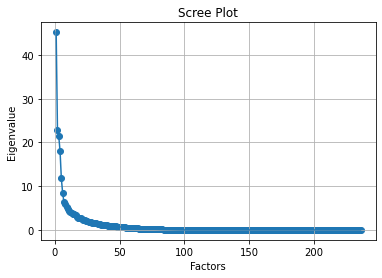

Factor Variance:
 (array([33.28981001, 30.83033658, 18.25290893, 17.68770213, 17.24962539]), array([0.14105852, 0.13063702, 0.07734283, 0.07494789, 0.07309163]), array([0.14105852, 0.27169554, 0.34903837, 0.42398626, 0.49707789]))


In [7]:
# Perform factor analysis
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(speech_features)

# Get factor loadings
loadings = fa.loadings_

# Print the factor loadings
print("Factor Loadings:\n", loadings)

# Plot the scree plot to determine the number of factors
ev, v = fa.get_eigenvalues()
plt.scatter(range(1, speech_features.shape[1] + 1), ev)
plt.plot(range(1, speech_features.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# If needed, extract the factor variance
variance = fa.get_factor_variance()
print("Factor Variance:\n", variance)


In [20]:
# Create a DataFrame for factor loadings
loadings_df = pd.DataFrame(loadings, index=speech_features.columns, columns=[f'Factor{i+1}' for i in range(loadings.shape[1])])
# Assign each speech feature to the factor with the highest loading
loadings_df['Assigned_Factor'] = loadings_df.idxmax(axis=1) #assign each speech feature to the factor with the highest loading.
# Export the DataFrame to a CSV file
loadings_df.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/factor_loadings.csv',sep = ";")

In [15]:
# If needed, extract the factor variance
variance = fa.get_factor_variance()
print("Factor Variance:\n", variance)

Factor Variance:
 (array([33.28981001, 30.83033658, 18.25290893, 17.68770213, 17.24962539]), array([0.14105852, 0.13063702, 0.07734283, 0.07494789, 0.07309163]), array([0.14105852, 0.27169554, 0.34903837, 0.42398626, 0.49707789]))


In [24]:
# Create a DataFrame to list each factor and its features
factor_features = loadings_df.reset_index().rename(columns={'index': 'Speech_Feature'})
factor_features = factor_features[['Speech_Feature', 'Assigned_Factor']]

# Export the DataFrame to a CSV file
factor_features.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/factor_features.csv',sep = ";")
factor_features


,Speech_Feature,Assigned_Factor
0,average_mfccs_3_neg,Factor3
1,average_mfccs_4_neg,Factor3
2,alpha_ratio_mean_neg,Factor3
3,alpha_ratio_sd_neg,Factor3
4,apq11_shimmer_neg,Factor5
...,...,...
231,verb_rate_pos,Factor4
232,word_count_pos,Factor4
233,word_frequency_mean_pos,Factor4
234,word_frequency_sd_pos,Factor4


In [30]:
# Create a dictionary to hold features and their loadings for each factor
factor_dict = {f'Factor{i+1}': [] for i in range(loadings.shape[1])}

# Populate the dictionary with features and their loadings assigned to each factor
for feature, factor in loadings_df['Assigned_Factor'].items():
    loading_value = loadings_df.loc[feature, factor]
    factor_dict[factor].append(f"{feature} ({loading_value:.2f})")

# Determine the maximum number of features in any factor to properly shape the DataFrame
max_len = max(len(features) for features in factor_dict.values())

# Create a DataFrame from the dictionary, filling empty spaces with NaN
factor_features_df = pd.DataFrame({k: pd.Series(v) for k, v in factor_dict.items()}).reindex(range(max_len))

# Export the DataFrame to a CSV file
factor_features_df.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/factor_features_with_loadings.csv',sep =";", index = False)

In [8]:
#pip install plotly

In [12]:
import plotly.express as px
# Get eigenvalues
ev, v = fa.get_eigenvalues()

# Create an interactive scree plot using plotly
fig = px.scatter(x=range(1, len(ev) + 1), y=ev, labels={'x': 'Factors', 'y': 'Eigenvalue'}, title='Scree Plot')
fig.add_traces(px.line(x=range(1, len(ev) + 1), y=ev).data)

# Show the plot
fig.show()